Spotify Music Hierarchical Clustering

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data and look at the first few rows:

In [38]:
# Load the dataset into a Pandas dataframe
data = pd.read_csv('./data/tracks_features.csv' ,sep = ',', nrows=2000)
print(data.head())  # Print the first few rows of the dataframe
print(data.describe())   # Print summary statistics for each column
print(data.info())   # Print information about the dataframe, including the number of rows and columns, and the data types of each column

                       id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj'] 

Preprocessing the dataset

array([[<Axes: title={'center': 'track_number'}>,
        <Axes: title={'center': 'disc_number'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

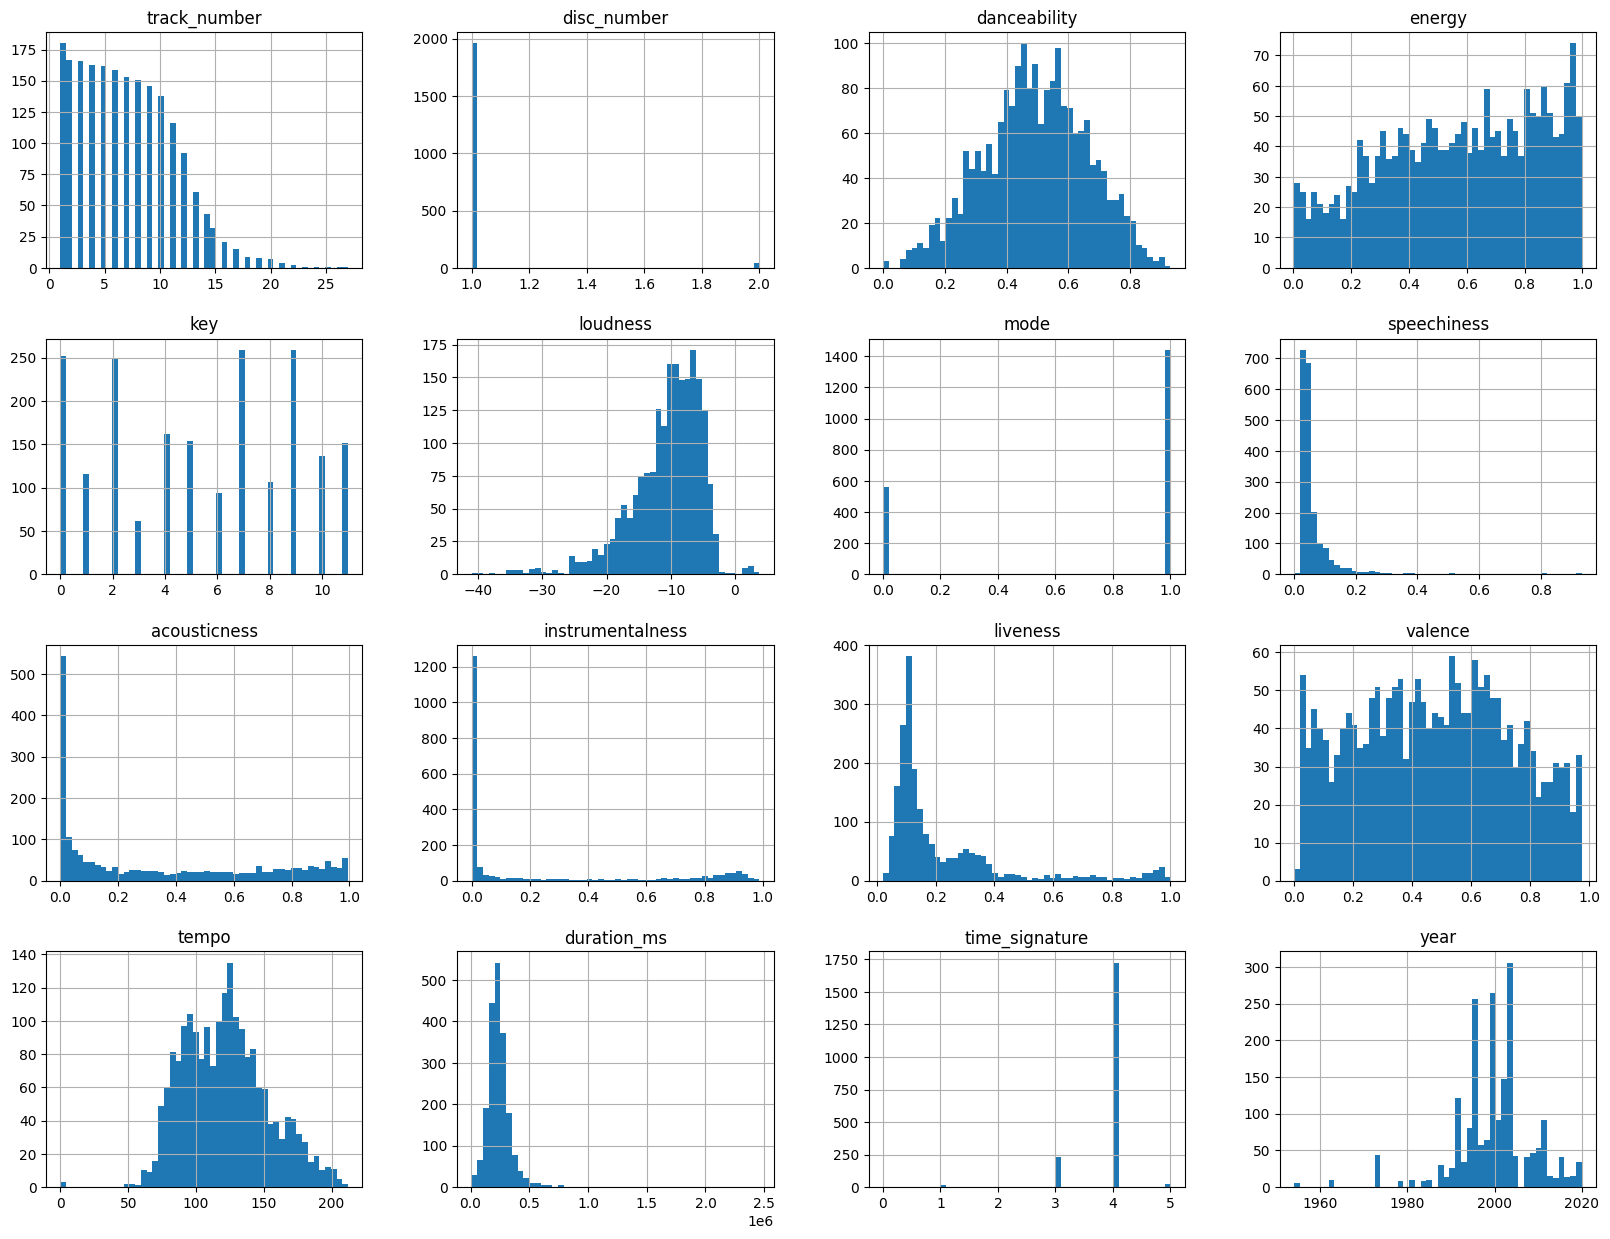

In [39]:
data.hist(bins=50, figsize=(20,15))   # Plot a histogram for each numerical attribute

In [40]:
# checking for null values
data.isnull().sum()

# Remove any rows with missing or invalid values
data.dropna(inplace=True)

# Select a subset of columns to use in the clustering process
columns_to_use = ['danceability','tempo']
data = data[columns_to_use]

# Normalize the values of each column
data = (data - data.mean()) / data.std()

data = pd.DataFrame(data, columns=data.columns)
data.head()
data=data.values


 Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem

Text(0, 0.5, 'Euclidean distances')

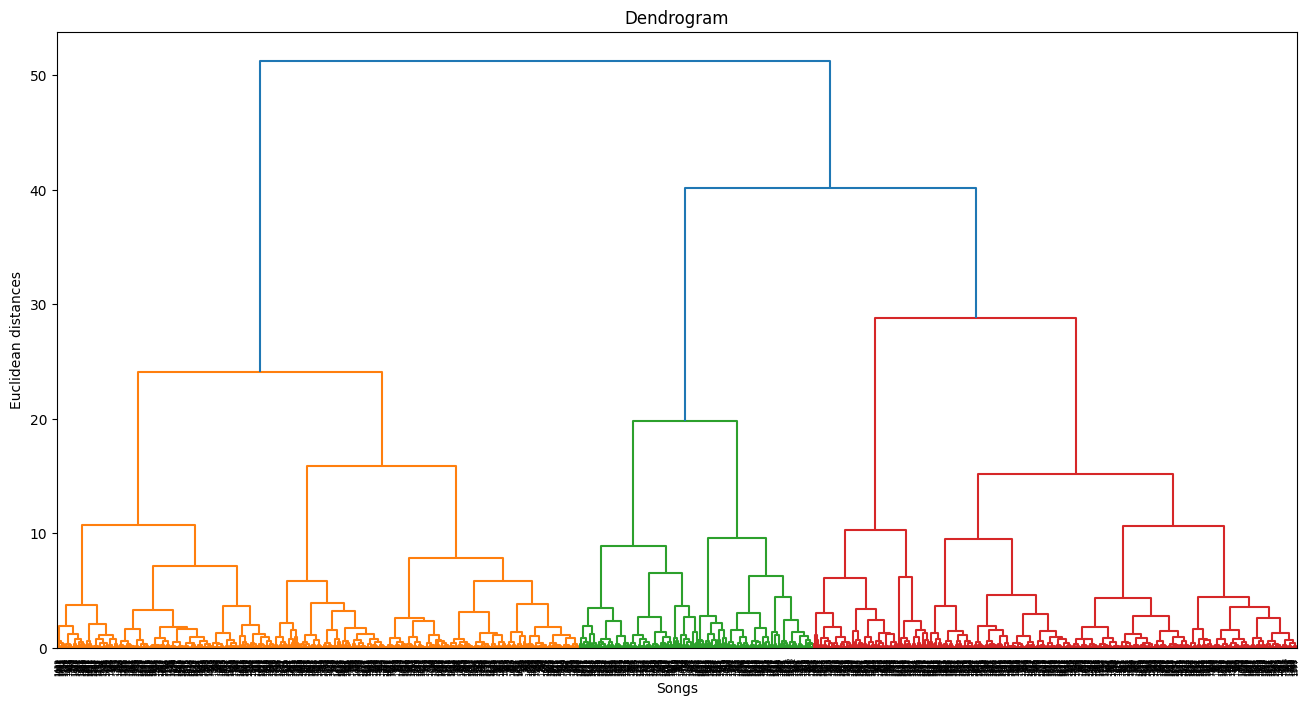

In [41]:
# importing the required module
import scipy.cluster.hierarchy as sch
# graph size
plt.figure(1, figsize = (16 ,8))
# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')


In this code, we start by defining the range of cluster numbers to try, from min_clusters to max_clusters. We then iterate through this range and perform Hierarchical Clustering using AgglomerativeClustering from scikit-learn.

For each number of clusters, we calculate the average silhouette score using silhouette_score from scikit-learn. The silhouette score measures the compactness and separation of clusters, with higher scores indicating better clustering.

We store the silhouette scores in a list, and then plot the silhouette scores against the number of clusters using matplotlib.pyplot. This plot helps visualize the trend of the silhouette scores as the number of clusters varies.

Finally, we find the optimal number of clusters by identifying the index of the maximum silhouette score and adding the min_clusters value to it. This gives us the actual number of clusters that maximizes the silhouette score.

By using the silhouette score, this code helps you determine the optimal number of clusters for Hierarchical Clustering based on the compactness and separation of the clusters.

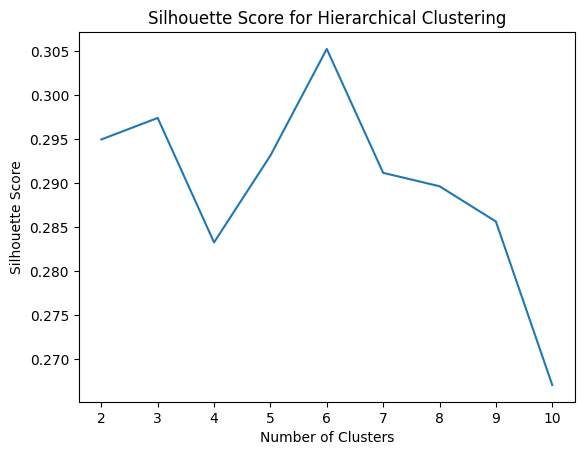

Optimal number of clusters: 6


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range of cluster numbers to try
min_clusters = 2
max_clusters = 10

# Store silhouette scores
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clustering.fit(data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, clustering.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

# Find the optimal number of clusters
optimal_num_clusters = np.argmax(silhouette_scores) + min_clusters
print("Optimal number of clusters:", optimal_num_clusters)

Apply hierarchical clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = optimal_num_clusters, metric = 'euclidean', linkage = 'ward')
X=cluster.fit_predict(data)

Visualise

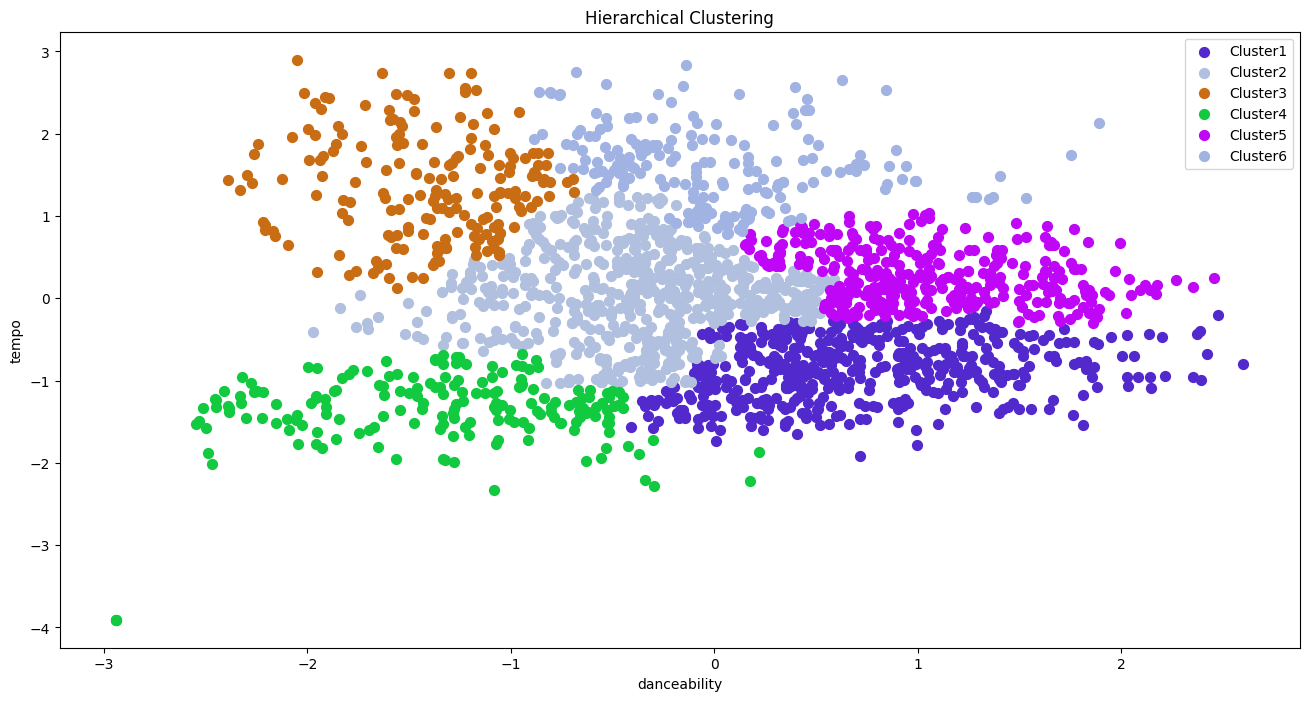

In [44]:

plt.figure(figsize=(16, 8))  

import random

# Generate random colors
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(optimal_num_clusters)]

for cluster_num in range(optimal_num_clusters):
    plt.scatter(data[X == cluster_num, 0], data[X == cluster_num, 1], s=50, c=colors[cluster_num], label=f'Cluster{cluster_num+1}')

plt.title('Hierarchical Clustering')
plt.xlabel('danceability')
plt.ylabel('tempo')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
 
   # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(data, X)

print("The average silhouette_score is :", silhouette_avg)

davies_bouldin_avg = davies_bouldin_score(data, X)

print("The average davies_bouldin_score is :", davies_bouldin_avg)


The average silhouette_score is : 0.3052204349333198
The average davies_bouldin_score is : 0.9053764750505146
